# ***CAPSTONE PROJECT***




# **Problem Statement**

**Customer Behaviour and it’s prediction lies at the core of every Business Model. From Stock Exchange, e-Commerce and Automobile to even Presidential Elections, predictions serve a great purpose. Most of these predictions are based on the data available about a person’s activity either online or in-person.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
dataset['Rating'] = dataset['Rating'].astype(float)

In [3]:
dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [4]:
dataset.shape

(203817, 2)

In [5]:
dataset.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [7]:
p = dataset.groupby('Rating')['Rating'].agg(['count'])
p

,count
Rating,
1.0,8151
2.0,17610
3.0,56223
4.0,77339
5.0,44463


In [8]:
movie_count = dataset.isnull().sum()[1]
movie_count

31

In [9]:
cust_count = dataset['Cust_Id'].nunique()-movie_count
cust_count

153322

In [10]:
rating_count = dataset['Cust_Id'].count() - movie_count

rating_count

203786

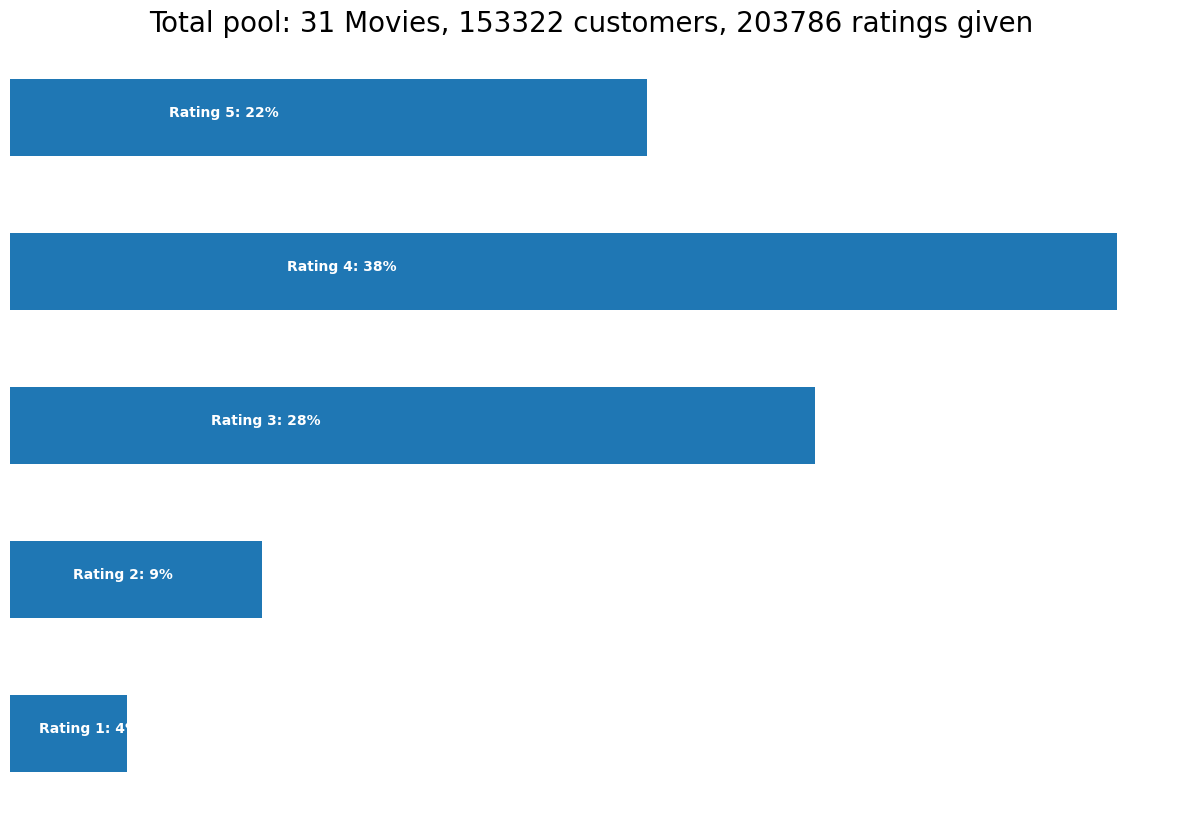

In [11]:
ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title(f'Total pool: {movie_count} Movies, {cust_count} customers, {rating_count} ratings given', fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')

In [12]:
df_nan = pd.DataFrame(pd.isnull(dataset.Rating), )

df_nan.head()

,Rating
0,True
1,False
2,False
3,False
4,False


In [13]:
df_nan = df_nan[df_nan['Rating'] == True]


df_nan.shape

(31, 1)

In [14]:
df_nan = df_nan.reset_index()



df_nan.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [ ]:
movie_np = []
movie_id = 1

for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):

    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

last_record = np.full((1,len(dataset) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [ 1.  1.  1. ... 30. 30. 30.]
Length: 203786


In [16]:
dataset = dataset[pd.notnull(dataset['Rating'])]

dataset['Movie_Id'] = movie_np.astype(int)
dataset['Cust_Id'] =dataset['Cust_Id'].astype(int)
print('-Dataset examples-')
dataset.head()

-Dataset examples-


<ipython-input-16-cff806879d4b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Movie_Id'] = movie_np.astype(int)
<ipython-input-16-cff806879d4b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Cust_Id'] =dataset['Cust_Id'].astype(int)


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [17]:
dataset.shape

(203786, 3)

In [28]:
f = ['count','mean']


In [19]:
dataset_movie_summary = dataset.groupby('Movie_Id')['Rating'].agg(f)

dataset_movie_summary.index = dataset_movie_summary.index.map(int)

movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7),0)

drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

Movie minimum times of review: 1245.0


In [20]:
dataset_cust_summary = dataset.groupby('Cust_Id')['Rating'].agg(f)
dataset_cust_summary.index = dataset_cust_summary.index.map(int)
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index

print(f'Customer minimum times of review: {cust_benchmark}')

Customer minimum times of review: 1.0


In [21]:
print(f'Original Shape: {dataset.shape}')

Original Shape: (203786, 3)


In [22]:
dataset = dataset[~dataset['Movie_Id'].isin(drop_movie_list)]
dataset = dataset[~dataset['Cust_Id'].isin(drop_cust_list)]
print('After Trim Shape: {}'.format(dataset.shape))

After Trim Shape: (195385, 3)


In [23]:
print('-Data Examples-')
dataset.head()

-Data Examples-


,Cust_Id,Rating,Movie_Id
695,1025579,4.0,3
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3


In [24]:
df_p = pd.pivot_table(dataset,values='Rating',index='Cust_Id',columns='Movie_Id')

print(df_p.shape)

(150252, 9)


In [25]:
df_p.head()

Movie_Id,3,8,16,17,18,24,26,28,30
Cust_Id,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
7,NaN,5.0,NaN,NaN,NaN,NaN,NaN,4.0,5.0
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [30]:
df_title = pd.read_csv('/content/movies.csv', encoding = "ISO-8859-1", header = None, names = ['Movie_Id', 'Year', 'Name'])

df_title.set_index('Movie_Id', inplace = True)

print (df_title.head(10))

                                        Year  \
Movie_Id                                       
movieId                                title   
1                           Toy Story (1995)   
2                             Jumanji (1995)   
3                    Grumpier Old Men (1995)   
4                   Waiting to Exhale (1995)   
5         Father of the Bride Part II (1995)   
6                                Heat (1995)   
7                             Sabrina (1995)   
8                        Tom and Huck (1995)   
9                        Sudden Death (1995)   

                                                 Name  
Movie_Id                                               
movieId                                        genres  
1         Adventure|Animation|Children|Comedy|Fantasy  
2                          Adventure|Children|Fantasy  
3                                      Comedy|Romance  
4                                Comedy|Drama|Romance  
5                              

In [36]:
!pip install surprise

  Using cached surprise-0.1-py2.py3-none-any.whl (1.8 kB)
  Using cached scikit-surprise-1.1.3.tar.gz (771 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162986 sha256=304f4629b390a1890654cf59fa43dac4aa633e2c10f883a6e6558dcd5f7873a1
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [37]:
import math
import re
import matplotlib.pyplot as plt

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [38]:
reader = Reader()

data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)

svd = SVD()

cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0412  1.0380  1.0329  1.0374  0.0034  
MAE (testset)     0.8245  0.8187  0.8218  0.8217  0.0024  
Fit time          2.67    4.95    3.38    3.66    0.96    
Test time         0.53    0.55    0.72    0.60    0.08    


{'test_rmse': array([1.04123721, 1.03803511, 1.03294613]),
 'test_mae': array([0.82451436, 0.81870059, 0.82179194]),
 'fit_time': (2.6650683879852295, 4.951292276382446, 3.375535726547241),
 'test_time': (0.5300858020782471, 0.5474715232849121, 0.7181015014648438)}

In [39]:
dataset.head()

,Cust_Id,Rating,Movie_Id
695,1025579,4.0,3
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3


In [40]:
dataset_712664 = dataset[(dataset['Cust_Id'] == 712664) & (dataset['Rating'] == 5)]
dataset_712664 = dataset_712664.set_index('Movie_Id')
dataset_712664 = dataset_712664.join(df_title)['Name']
dataset_712664.head(10)

Movie_Id
3    NaN
Name: Name, dtype: object

In [41]:
user_712664 = df_title.copy()

user_712664 = user_712664.reset_index()

user_712664 = user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]

data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']], reader)

trainset = data.build_full_trainset()
svd.fit(trainset)

user_712664['Estimate_Score'] = user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)

user_712664 = user_712664.drop('Movie_Id', axis = 1)

user_712664 = user_712664.sort_values('Estimate_Score', ascending=False)

print(user_712664.head(10))

                                   Year                    Name  \
0                                 title                  genres   
18194                   LennoNYC (2010)             Documentary   
18192          Wuthering Heights (2011)                   Drama   
18191                    Wichita (1955)  Action|Romance|Western   
18190      Story of Mankind, The (1957)           Drama|Fantasy   
18189                     Fright (1972)   Crime|Horror|Thriller   
18188  Shaolin (Xin shao lin si) (2011)            Action|Drama   
18187          Big Hangover, The (1950)                  Comedy   
18186          Another Happy Day (2011)                   Drama   
18185     I Want to Be a Soldier (2011)                   Drama   

       Estimate_Score  
0            3.828967  
18194        3.828967  
18192        3.828967  
18191        3.828967  
18190        3.828967  
18189        3.828967  
18188        3.828967  
18187        3.828967  
18186        3.828967  
18185        3.828967 